In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
# Load the CSV into a DataFrame
file_path = "/home/betty/Desktop/Becode_training_path/Projects/Data_analysis/csv-data/cleaned_dataset_analysis.csv" 
df = pd.read_csv(file_path)

In [19]:
#Dataframe description:
rows_and_cols = df.shape
print(rows_and_cols)
col_names = df.columns.to_list()
print(col_names)


(10574, 22)
['Locality', 'Zip Code', 'Type of Property', 'Subtype of Property', 'Price', 'Type of Sale', 'Number of Rooms', 'Livable Space (m2)', 'Fully Equipped Kitchen', 'Furnished', 'Open Fire', 'Terrace', 'Terrace Area (m2)', 'Garden', 'Garden Area (m2)', 'Swimming Pool', 'Surface of the Land (m2)', 'Number of Facades', 'PEB', 'Primary Energy Consumption (kWh/m2)', 'State of the Building', 'Province']


In [20]:
# Count the number of qualitative and quantitative variables
qualitative_vars = df.select_dtypes(include='object').shape[1]
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).shape[1]
print(f"Qualitative variables: {qualitative_vars}")
print(f"Quantitative variables: {quantitative_vars}")

# Sort and group the dtypes
dtypes_sorted = df.dtypes.sort_values()
# Print them grouped by type
for dtype in dtypes_sorted.unique():
    print(f"{dtype}:\n")
    print(dtypes_sorted[dtypes_sorted == dtype], "\n")

Qualitative variables: 6
Quantitative variables: 16
int64:

Open Fire                 int64
Garden                    int64
Terrace                   int64
Furnished                 int64
Swimming Pool             int64
Livable Space (m2)        int64
Fully Equipped Kitchen    int64
Type of Sale              int64
Zip Code                  int64
dtype: object 

float64:

Price                                  float64
Number of Facades                      float64
Primary Energy Consumption (kWh/m2)    float64
Terrace Area (m2)                      float64
Garden Area (m2)                       float64
Number of Rooms                        float64
Surface of the Land (m2)               float64
dtype: object 

object:

PEB                      object
Locality                 object
Subtype of Property      object
Type of Property         object
State of the Building    object
Province                 object
dtype: object 



### To calculate correlation:
- Correlation requires numerical (quantitative) variables.
- Categorical variables (e.g., gender, color) cannot be directly used unless encoded numerically.
- The number of observations for both variables must be equal.
- While the actual units of the variables do not matter for correlation, the data should ideally not contain extreme differences in scale (e.g., comparing millimeters to kilometers) unless standardized.
- Outliers can heavily influence correlation calculations, especially for Pearson correlation.


In [21]:
selected_columns = [
    'Number of Rooms', 'Surface of the Land (m2)', 
    'Number of Facades','Primary Energy Consumption (kWh/m2)', 
    'Livable Space (m2)', 'Terrace Area (m2)', 'Garden Area (m2)'
    ]  

In [22]:
# Calculate the correlation matrix for the selected columns and 'Price'
correlations = df[selected_columns + ['Price']].corr()
correlation_with_price = correlations['Price'].sort_values(ascending=False)
print(correlation_with_price)

Price                                  1.000000
Livable Space (m2)                     0.583539
Number of Rooms                        0.453200
Surface of the Land (m2)               0.228470
Number of Facades                      0.220988
Garden Area (m2)                       0.107853
Terrace Area (m2)                      0.070134
Primary Energy Consumption (kWh/m2)   -0.020110
Name: Price, dtype: float64


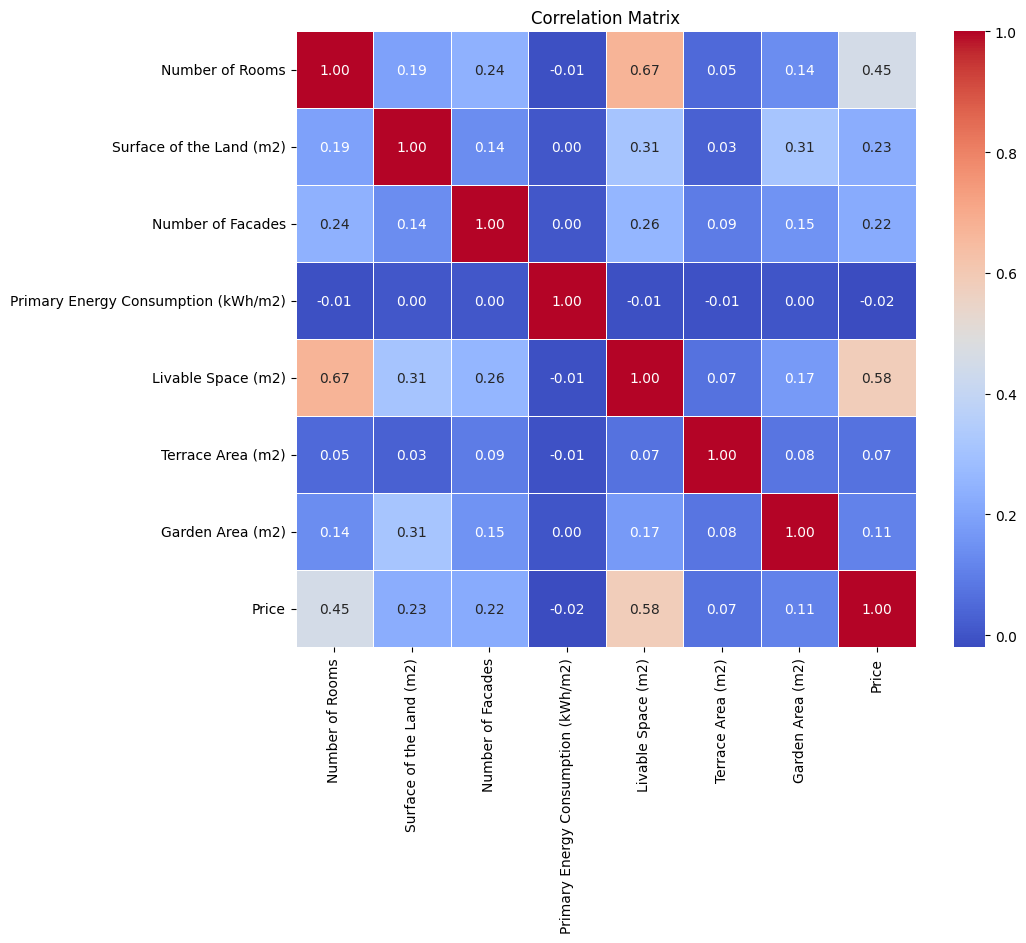

In [23]:
# correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Conclusions:
1. **Livable Space (m²)**: 
- Moderate positive correlation: As the livable space increases, the price tends to increase. This is a relatively strong predictor of price compared to the other variables.
- Likely a significant factor in determining property prices, indicating that buyers value larger livable spaces.
- Many tax systems base property taxes on assessed value, which often depends on the size of the livable space. A strong correlation between price and livable space implies that properties with larger livable areas are likely taxed higher due to their higher assessed value.

2. **Number of Rooms**:
- More rooms are generally associated with higher prices. This makes sense with the previous statement and it is a prove of a well-cleaned dataset

3. **Surface of the Land (m²)**:
- Weak positive correlation: Larger land plots have a minor but positive impact on price.
- This could mean that buyers are willing to pay more for properties with more land, but the influence is less than the living space.

4. **Number of Facades**:
- Weak positive correlation: Properties with more facades might be slightly more valuable, however, the impact on price is minimal.

5. **Garden Area (m²)**: 
- Very weak positive correlation: While a garden may be a selling point, its size has a negligible direct impact on price

6. **Terrace Area (m²)**:
- Very weak positive correlation: A terrace might have some appeal, but its size has virtually no impact on price in this dataset.

7. **Primary Energy Consumption (kWh/m²)**:
- Very weak negative correlation: Energy consumption per square meter has almost no impact on price in this dataset.
